# Using gain ratio to find the importance of features

# IoT23 Data Preprocessing with 6 million samples 

In [1]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import time as timer

In [2]:
data= pd.read_csv('clean_data_new.csv',low_memory=False,error_bad_lines=False)

In [3]:
data.head()

,Unnamed: 0,ts,id.orig_p,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,98304,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
1,98305,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
2,98306,1.536227e+09,17832.0,37215.0,tcp,-,6000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
3,98307,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
4,98308,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru


Oh..! we have extra column.. lets get rid of it 

In [4]:
del data['Unnamed: 0']

In [5]:
data.shape

(884228, 16)

Ok...! now we have our data with 14 features ! and around 6 million samples..! 
Its time to clean the data and bring it in good format! 

In [6]:
data.head()

,ts,id.orig_p,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
1,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
2,1.536227e+09,17832.0,37215.0,tcp,-,6000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
3,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
4,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru


separate target and indepedent variables

In [7]:
X=data.iloc[:,:-1]

In [8]:
Y=data['label']

convert the variables into real type

In [9]:
X['orig_bytes']=X['orig_bytes'].astype(float)

In [10]:
X['duration']=X['duration'].astype(float)

In [11]:
X['resp_bytes']=X['resp_bytes'].astype(float)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884228 entries, 0 to 884227
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ts             884228 non-null  float64
 1   id.orig_p      884228 non-null  float64
 2   id.resp_p      884228 non-null  float64
 3   proto          884228 non-null  object 
 4   service        884228 non-null  object 
 5   duration       884228 non-null  float64
 6   orig_bytes     884228 non-null  float64
 7   resp_bytes     884228 non-null  float64
 8   conn_state     884228 non-null  object 
 9   missed_bytes   884228 non-null  float64
 10  history        884228 non-null  object 
 11  orig_pkts      884228 non-null  float64
 12  orig_ip_bytes  884228 non-null  float64
 13  resp_pkts      884228 non-null  float64
 14  resp_ip_bytes  884228 non-null  float64
dtypes: float64(11), object(4)
memory usage: 101.2+ MB


In [13]:
cat_df =X.select_dtypes(include=['object']).copy()

In [14]:
cat_df.head()

,proto,service,conn_state,history
0,tcp,-,S0,S
1,tcp,-,S0,S
2,tcp,-,S0,S
3,tcp,-,S0,S
4,tcp,-,S0,S


In [15]:
num_df =X.select_dtypes(exclude=['object']).copy()
num_df.head()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1.536227e+09,17832.0,37215.0,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
1,1.536227e+09,17832.0,37215.0,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
2,1.536227e+09,17832.0,37215.0,6000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
3,1.536227e+09,17832.0,37215.0,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
4,1.536227e+09,17832.0,37215.0,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0


In [16]:
enc_cat =cat_df.apply(LabelEncoder().fit_transform)

In [17]:
clean_data =pd.concat([num_df, enc_cat],axis=1)

In [18]:
clean_data.shape

(884228, 15)

In [19]:
le=LabelEncoder()

In [20]:
Ym=le.fit_transform(Y)

In [21]:
X_t=clean_data

In [22]:
Ym

array([ 9,  9,  9, ..., 10, 10, 10])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Ym, random_state=100, test_size=0.20)

In [25]:
from sklearn.feature_selection import mutual_info_classif

In [26]:
gain_info=mutual_info_classif(X_train,Y_train)

In [27]:
gain_info

array([1.17754850e+00, 9.12731686e-01, 1.19029522e+00, 1.56960229e-01,
       3.33787583e-02, 2.99395447e-02, 3.49199445e-04, 5.19507490e-01,
       7.21814756e-01, 2.95865243e-02, 3.12788476e-02, 7.96049872e-02,
       1.67693450e-02, 4.63028198e-01, 4.58603106e-01])

In [28]:
mut_info=pd.Series(gain_info)

In [29]:
mut_info.index=X_train.columns
mut_info.sort_values(ascending=False)

id.resp_p        1.190295
ts               1.177549
id.orig_p        0.912732
orig_ip_bytes    0.721815
orig_pkts        0.519507
conn_state       0.463028
history          0.458603
duration         0.156960
proto            0.079605
orig_bytes       0.033379
resp_ip_bytes    0.031279
resp_bytes       0.029940
resp_pkts        0.029587
service          0.016769
missed_bytes     0.000349
dtype: float64

Text(0.5, 1.0, 'Mutual information classification')

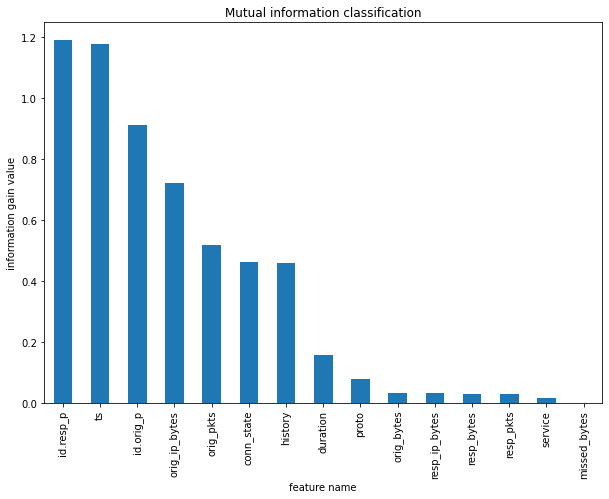

In [30]:
mut_info.sort_values(ascending=False).plot.bar(figsize=(10,7))
plt.xlabel('feature name')
plt.ylabel('information gain value')
plt.title('Mutual information classification')